<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/TU_Dortmund/blob/main/ASL_Sheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

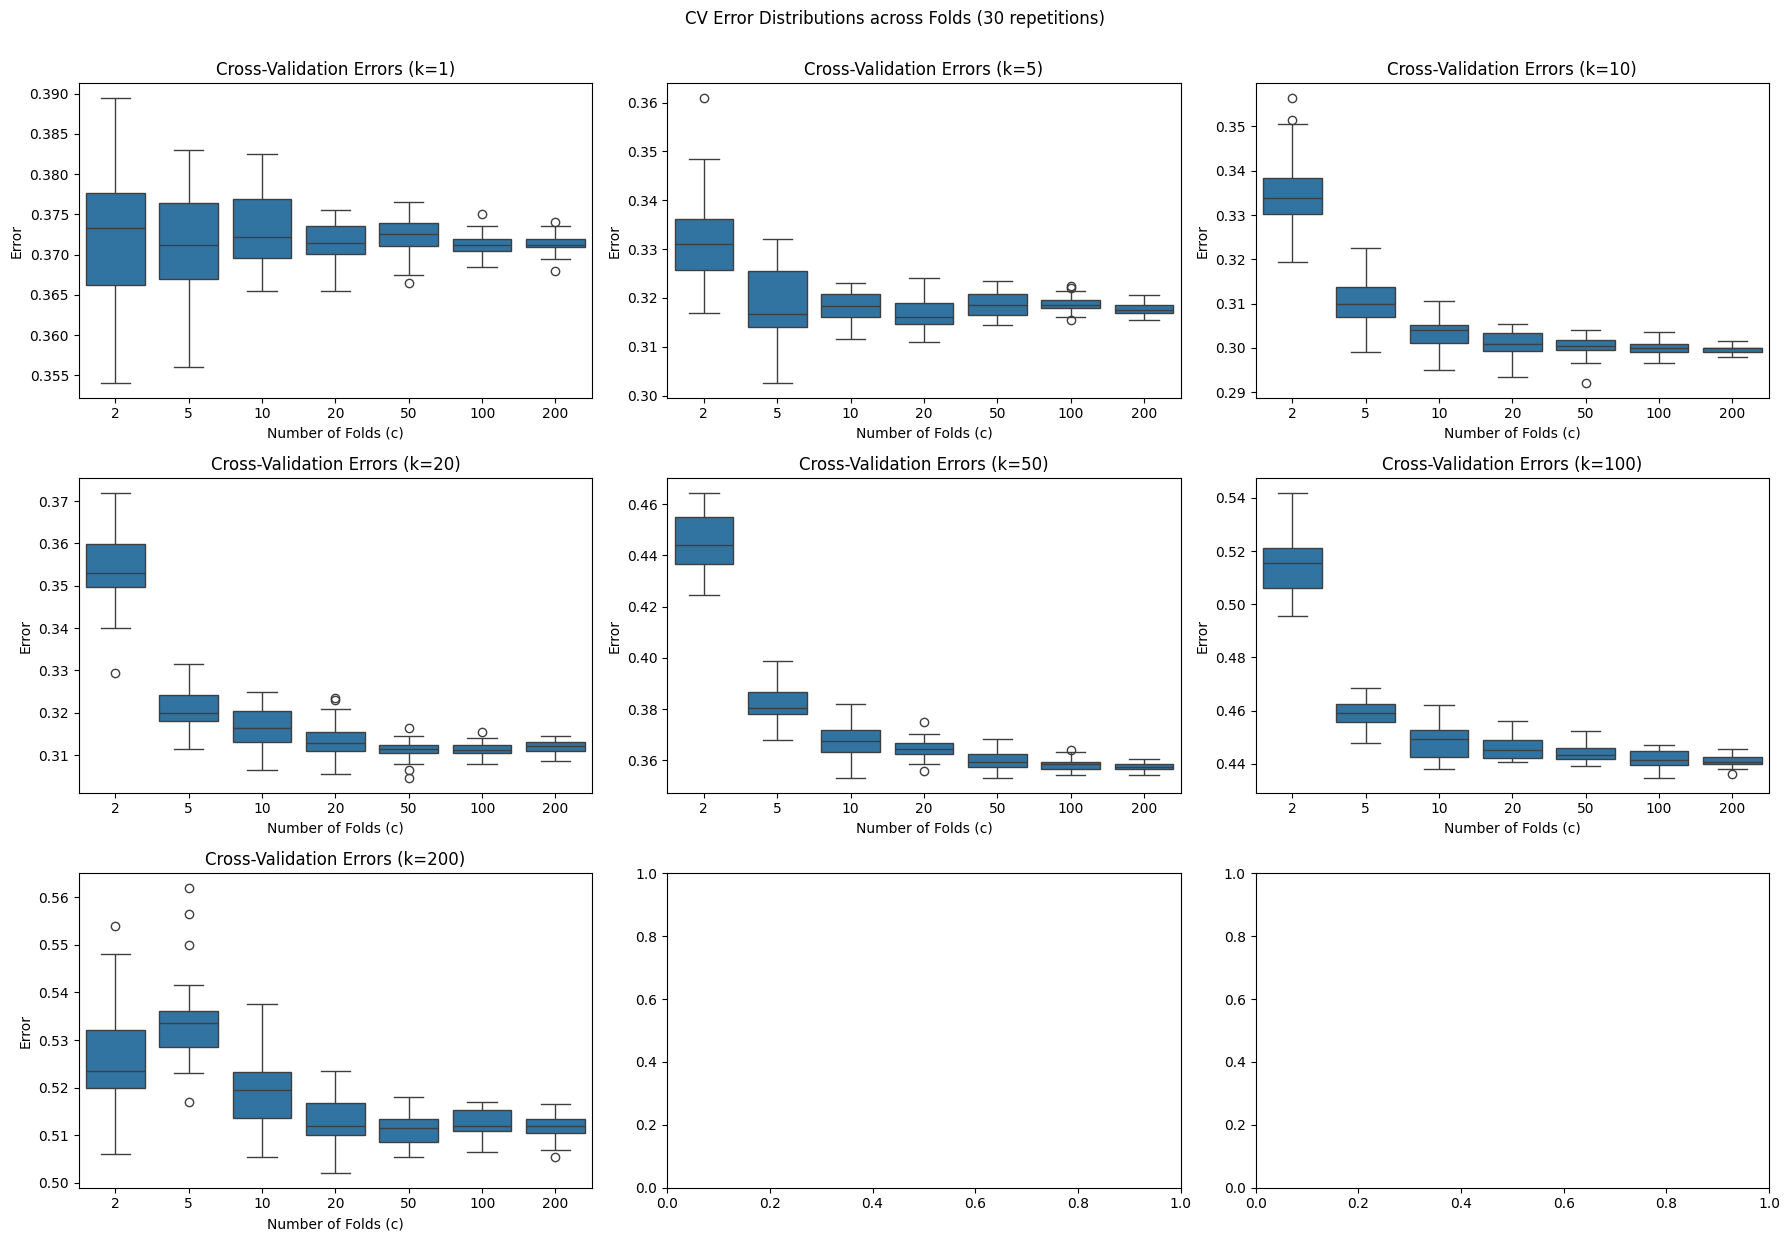

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, zero_one_loss

# Load the dataset
data = pd.read_csv("dat_class.csv")
X = data[['x1', 'x2']].values
y = data['y'].values

# Define parameters
k_values = [1, 5, 10, 20, 50, 100, 200]
c_values = [2, 5, 10, 20, 50, 100, 200]
repeats = 30

# Create a dictionary to store results
results = {k: {c: [] for c in c_values} for k in k_values}

# Scorer for misclassification rate
misclassification = make_scorer(zero_one_loss)

# Run cross-validation
rng = np.random.default_rng(42)
for k in k_values:
    for c in c_values:
        for _ in range(repeats):
            kf = KFold(n_splits=c, shuffle=True, random_state=rng.integers(0, 10000))
            model = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(model, X, y, cv=kf, scoring=misclassification)
            results[k][c].append(np.mean(scores))

# Convert results into DataFrame for plotting
df_cv = []
for k in k_values:
    for c in c_values:
        for value in results[k][c]:
            df_cv.append({'k': k, 'c': c, 'error': value})

df_cv = pd.DataFrame(df_cv)

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

# Create one plot per k
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axs = axs.flatten()

for idx, k in enumerate(k_values):
    ax = axs[idx]
    sns.boxplot(data=df_cv[df_cv['k'] == k], x='c', y='error', ax=ax)
    ax.set_title(f"Cross-Validation Errors (k={k})")
    ax.set_xlabel("Number of Folds (c)")
    ax.set_ylabel("Error")

plt.tight_layout()
plt.suptitle("CV Error Distributions across Folds (30 repetitions)", y=1.03)
plt.show()

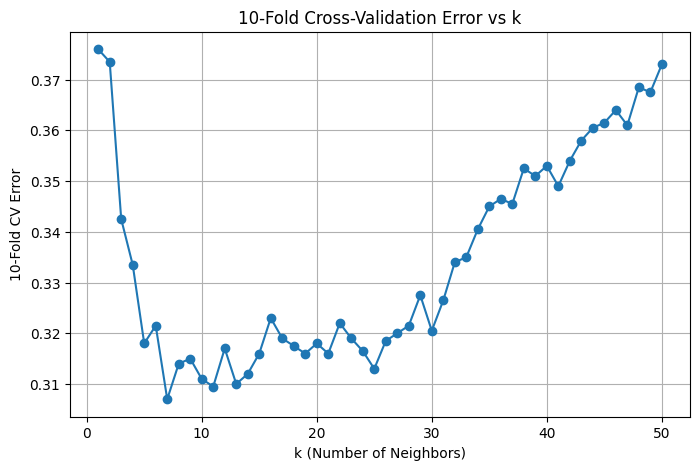

In [5]:
from sklearn.model_selection import cross_val_score

# Part (c): Perform 10-fold CV once for each k in 1 to 50
k_range = range(1, 51)
cv_errors_10fold = []

# Use 10-fold CV once per k
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=10, scoring=misclassification)
    mean_error = np.mean(scores)
    cv_errors_10fold.append(mean_error)

# Plot error vs k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_errors_10fold, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("10-Fold CV Error")
plt.title("10-Fold Cross-Validation Error vs k")
plt.grid(True)
plt.show()

In [9]:
data.shape

(2000, 3)